In [1]:
from PIL import Image
import pytesseract
# tesseract binary needs to be installed
# - mac: brew install tesseract
# - ubuntu: sudo apt-get install tesseract-ocr

In [2]:
%matplotlib inline

In [2]:
from skimage import io, morphology, filters, transform, feature, measure
import numpy as np

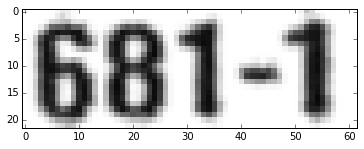

In [4]:
img = io.imread('data/ids/TP14.png')
mask = np.index_exp[243:265, 188:250]
io.imshow(img[mask])

In [18]:
pytesseract.image_to_string(Image.fromarray(img[mask]).resize((50,19)))

'581-1'

In [3]:
from skimage import *
from scipy.ndimage import binary_fill_holes
import matplotlib.pyplot as plt

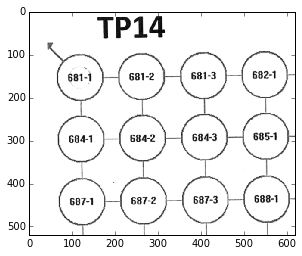

In [41]:
mask = np.index_exp[100:620,100:720]
io.imshow(img[mask])

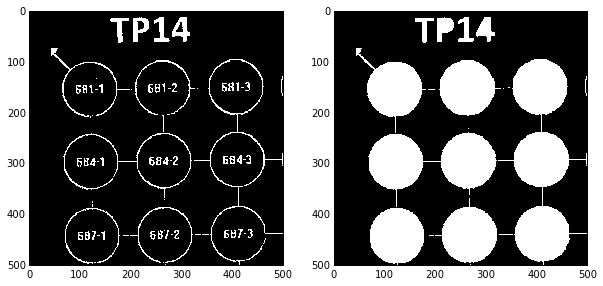

In [117]:
binary = img[mask] <= filters.threshold_otsu(img)
binary = morphology.binary_erosion(binary, selem=np.array(((1,0),(0,1))))
plt.figure(figsize=(10,20))
plt.subplot(121); io.imshow(binary)

filled = binary_fill_holes(binary)
plt.subplot(122); io.imshow(filled);

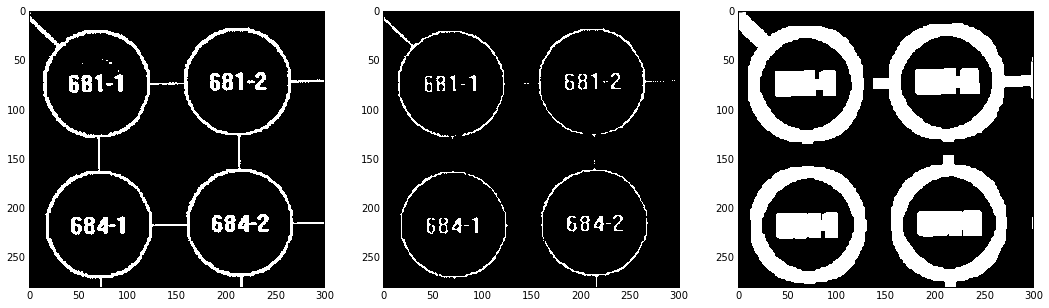

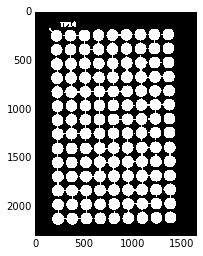

In [154]:
mask = np.index_exp[180:460, 150:450]

threshold = img < filters.threshold_otsu(img)
plt.figure(figsize=(18,6))
plt.subplot(131); io.imshow(threshold[mask])

selem = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])
binary = morphology.binary_erosion(threshold, selem)
plt.subplot(132); io.imshow(binary3[mask])

selem = np.ones((11,11))
binary = morphology.binary_dilation(binary, selem)
plt.subplot(133); io.imshow(binary[mask])

filled = binary_fill_holes(binary)
plt.figure(); io.imshow(filled);

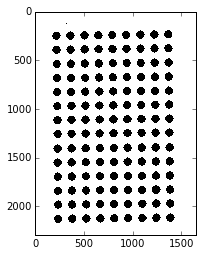

In [180]:
# shrink area
selem = np.ones((30,30))
text_mask = morphology.binary_dilation(-filled, selem)
io.imshow(text_mask)

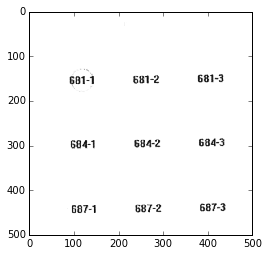

In [182]:
mask = np.index_exp[100:600, 100:600]

text_img = np.copy(img)
text_img[text_mask] = 255
io.imshow(text_img[mask])

In [184]:
print(pytesseract.image_to_string(Image.fromarray(text_img)))

591-'1

684-1

687-1

690-1

695-1

700-1

703-1

706-1

709-1

712-1

715-1

718-1

721-1

7254

681 -2

68 4-2

687-2

690-2

69 5-2

700-2

703-2

706-2

709-2

712-2

715-2

718-2

721-2

725-2

681-3

684-3

687-3

690-3

595-3

700-3

703-3

706-3

709-3

712-3

715-3

718-3

721-3

725-3

682-1

685-1

688-1

692-1

697-1

701-1

704-1

707-1

710-1

713-1

716-1

719-1

722-1

726-1

682-2

685-2

688-2

692-2

697-2

701-2

704-2

707-2

710-2

713-2

715-:

719-2

722-2

726-2

6 82-3

685-3

688-3

692-3

69 7-3

701-3

704-3

707-3

710-3

713-3

716-3

719-3

722-3

726-3

683-1

886-1

689-1

69 4-1

699-1

7 02-1

705-1

708-1

711-1

714-1

717-1

720-1

723-1

727-1

683-2

686-2

689-2

694-2

69 9-2

702-2

705-2

708-2

711-2

714-2

717-2

720-2

723-2

727-2

saa-13

686-3

689-3

694-3

699-3

702-3

705-3

708-3

711-3

714-3

717-3

720-3

723-3

727-3


In [185]:
io.imsave('data/ids/TP14-filtered.png', text_img)

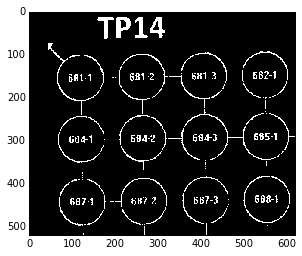

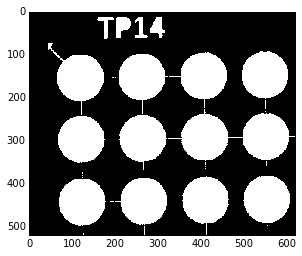

In [51]:
binary = img[mask] <= filters.threshold_otsu(img)
binary = morphology.binary_erosion(binary, selem=np.array(((1,0),(0,1))))
io.imshow(binary)
filled = binary_fill_holes(binary)
plt.figure(); io.imshow(filled);

In [4]:
def remove_borders(filename):
    "Remove borders from image, leave only the text"
    img = io.imread(filename)
    
    # threshold
    threshold = img <= filters.threshold_yen(img)

    # erode
    size = 3
    selem = np.zeros((size, size), dtype=np.bool)
    selem[size//2,:] = True
    selem[:,size//2] = True
#    selem = np.array([[0,1,0],
#                      [1,1,1],
#                      [0,0,0]])
    img = filters.rank.mean(img, selem)
    binary = morphology.binary_erosion(threshold, selem)

    # dilate
    selem = np.ones((9,9))
    binary = morphology.binary_dilation(binary, selem)
    
    # fill holes
    filled = binary_fill_holes(binary)
    
    # shrink area
    selem = np.ones((20,20))
    text_mask = morphology.binary_dilation(-filled, selem)

    # remove borders
    img[text_mask] = 255
    
    # save
    io.imsave(filename[:-4] + '-filtered.png', img)

In [63]:
remove_borders('data/ids/TP17.png')

In [194]:
!ls data/ids/TP[0-9].png data/ids/TP[0-9][0-9].png

data/ids/TP1.png  data/ids/TP14.png data/ids/TP19.png data/ids/TP3.png  data/ids/TP8.png
data/ids/TP10.png data/ids/TP15.png data/ids/TP2.png  data/ids/TP4.png  data/ids/TP9.png
data/ids/TP11.png data/ids/TP16.png data/ids/TP20.png data/ids/TP5.png
data/ids/TP12.png data/ids/TP17.png data/ids/TP21.png data/ids/TP6.png
data/ids/TP13.png data/ids/TP18.png data/ids/TP22.png data/ids/TP7.png


In [6]:
files = !ls data/ids/TP[0-9].png data/ids/TP[0-9][0-9].png

In [202]:
from joblib import Parallel, delayed

In [9]:
Parallel(n_jobs=4)(delayed(remove_borders)(f) for f in files)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
remove_borders_highres('data/ids/highres/TP1-highres.png')

In [14]:
i = Image.open('data/ids/highres/TP1-highres.png')

In [21]:
size = [x//2 for x in i.size]
size

[2480, 3436]

In [22]:
i.thumbnail(size, Image.ANTIALIAS)

In [23]:
i.save('data/ids/highres/TP1-scaled.png')

In [24]:
remove_borders('data/ids/highres/TP1-scaled.png')

In [32]:
def remove_borders_highres(filename):
    "Remove borders from image, leave only the text"
    img = io.imread(filename)
    
    # threshold
    threshold = img < filters.threshold_otsu(img)

    # erode
    size = 5
    selem = np.zeros((size, size), dtype=np.bool)
    selem[size//2,:] = True
    selem[:,size//2] = True
    binary = morphology.binary_erosion(threshold, selem)

    # dilate
    selem = np.ones((size*3,size*3))
    binary = morphology.binary_dilation(binary, selem)
    io.imshow(binary)
    
    # fill holes
    filled = binary_fill_holes(binary)
    
    # shrink area
    selem = np.ones((30,30))
    text_mask = morphology.binary_dilation(-filled, selem)

    # remove borders
    img[text_mask] = 255
    
    # save
    io.imsave(filename[:-4] + '-filtered.png', img)

In [143]:
%matplotlib qt

In [144]:
img = io.imread('data/ids/TP17.png')

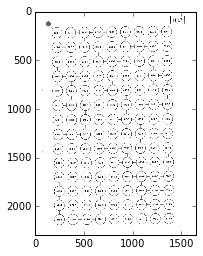

In [142]:
io.imshow(img)

In [8]:
thresh = filters.threshold_otsu(img)
filtered = img <= thresh
selem = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])
filtered = morphology.binary_dilation(filtered, selem)

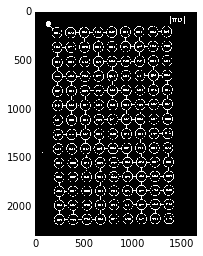

In [135]:
io.imshow(filtered)

In [10]:
labeled = measure.label(filtered)
io.imshow(labeled)

/Users/arve/.virtualenvs/3.4/lib/python3.4/site-packages/scikit_image-0.11dev-py3.4-macosx-10.9-x86_64.egg/skimage/io/_plugins/matplotlib_plugin.py:69: UserWarning: Non-standard image type; displaying image with stretched contrast.
  warnings.warn("Non-standard image type; displaying image with "


In [16]:
%matplotlib inline

In [36]:
def circle_score(r):
    score = abs(r.equivalent_diameter - (r.bbox[2] - r.bbox[0]))
    return score

In [72]:
# find circles by area-diameter relationship
circles = []
for r in measure.regionprops(labeled):
    r.circle_score = circle_score(r)
    if r.circle_score < 10:
        circles.append(r)

In [73]:
circles = sorted(circles, key=lambda r: r.circle_score)

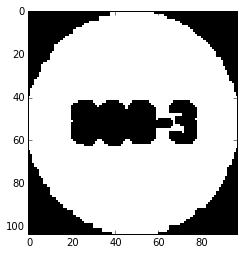

In [74]:
io.imshow(circles[-10].image)

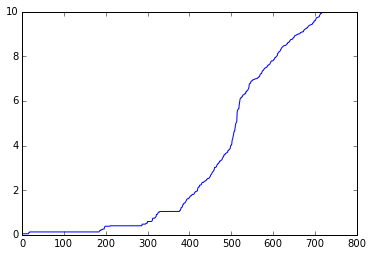

In [75]:
y = [r.circle_score for r in circles]
plt.plot(y)

In [76]:
np.median(y), min(y)

(1.0455899523883203, 0.04558995238832031)

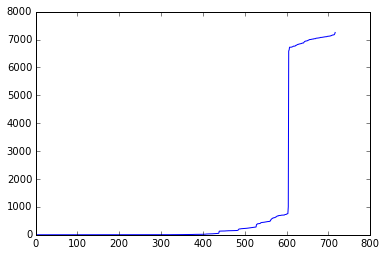

In [77]:
y = [r.area for r in circles]
y.sort()
plt.plot(y)

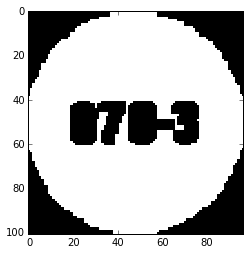

In [79]:
io.imshow(circles[600].image)

In [80]:
r = circles[600]

In [85]:
r.area, r.bbox[2]-r.bbox[0], r.equivalent_diameter, (r.convex_area/3.14)**0.5

(6822.0, 101, 93.19892796692073, 49.936265111123475)

In [95]:
def circle_score(r):
    y0,x0,y1,x1 = r.bbox
    height = y1-y0
    width = x1-x0
    radius = (r.convex_area/3.14)**0.5
    score = 10-abs(height-width)
    score += 10-abs(radius - height/2)
    if r.area < 5000 or r.area > 8000:
        score -= 20
    return score

In [96]:
new_scores = [circle_score(r) for r in circles]
plt.plot(new_scores)    

In [91]:
len([s for s in new_scores if s > 0])

112

In [92]:
%matplotlib qt

In [94]:
for r in circles:
    if circle_score(r) > 0:
        plt.figure()
        io.imshow(r.image)

In [98]:
# find circles by area-diameter relationship
circles = []
for r in measure.regionprops(labeled):
    r.circle_score = circle_score(r)
    if r.circle_score > 0:
        circles.append(r)

In [102]:
len(circles) == 14*9

True

In [103]:
r = circles[0]

In [104]:
%matplotlib inline

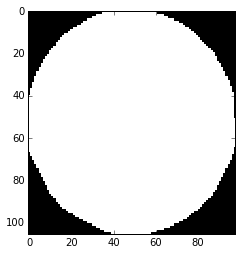

In [105]:
io.imshow(r.convex_image)

(slice(157, 263, None), slice(1294, 1392, None))

In [120]:
mask = np.zeros_like(img, dtype=np.bool)

In [121]:
for c in circles:
    y,x,y1,x1 = c.bbox
    m = np.index_exp[y:y1, x:x1]
    mask[m] = c.convex_image

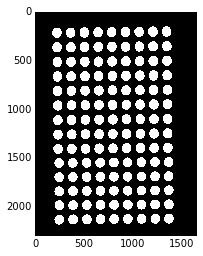

In [122]:
io.imshow(mask)

In [132]:
img[-mask] = 255

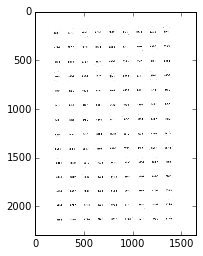

In [133]:
io.imshow(img)

In [134]:
io.imsave('data/ids/TP17-filtered.png', img)

In [196]:
def circle_score(r):
    y0,x0,y1,x1 = r.bbox
    height = y1-y0
    width = x1-x0
    radius = (r.convex_area/3.14)**0.5
    score = 10-abs(height-width)
    score += 10-abs(radius - height/2)
    if r.area < 5000 or r.area > 8000:
        score -= 20
    return score

In [197]:
def remove_borders(filename):
    "Remove borders from image, leave only the text"
    img = io.imread(filename)
    
    # create binary image
    thresh = filters.threshold_otsu(img)
    binary = img <= thresh
    
    # enforce lines
    selem = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]])
    binary = morphology.binary_dilation(binary, selem)
    
    # find connected areas
    labeled = measure.label(binary)
    
    # create mask of circles in image
    mask = np.zeros_like(img, dtype=np.bool)
    for r in measure.regionprops(labeled):
        if circle_score(r) > 0:
            y,x,y1,x1 = r.bbox
            m = np.index_exp[y:y1, x:x1]
            mask[m] = r.convex_image
    
    # apply mask
    img[-mask] = 255
    
    # save
    io.imsave(filename[:-4] + '-filtered.png', img)

In [200]:
files = !ls data/ids/TP[0-9].png data/ids/TP[1-2][0-9].png
files = [f for f in files if 'TP22' not in f] # area does not correlate with other images

In [203]:
Parallel(n_jobs=4)(delayed(remove_borders)(f) for f in files)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [192]:
remove_borders('data/ids/TP22.png')

In [155]:
filename = 'data/ids/TP22.png'
img = io.imread(filename)

# create binary image
thresh = filters.threshold_otsu(img)
binary = img <= thresh

# enforce lines
selem = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])
binary = morphology.binary_dilation(binary, selem)

# find connected areas
labeled = measure.label(binary)

# create mask of circles in image
mask = np.zeros_like(img, dtype=np.bool)
for r in measure.regionprops(labeled):
    if circle_score(r) > 0:
        y,x,y1,x1 = r.bbox
        m = np.index_exp[y:y1, x:x1]
        mask[m] = r.convex_image

# apply mask
img[-mask] = 255


In [188]:
regions = measure.regionprops(labeled)
y = [r.convex_area for r in regions if (r.convex_area > 200) and (r.convex_area < 20000)]
y.sort()

In [178]:
%matplotlib inline

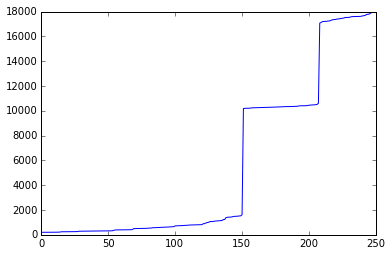

In [189]:
plt.plot(y)

In [180]:
labeled.shape

(2291, 1653)

In [186]:
r = circles[-1]
r.image.shape

(101, 100)

In [187]:
r.convex_area

7897